In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import os

In [2]:
np.random.seed(2019)

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
#import clean and cat data
directory = os.getcwd()

OG = pd.read_csv(directory + '/EMS_2017_2018_cat_final_onehot.csv', sep=',')

In [5]:
##FINAL DATASET
data_wrk = OG.sample(n = 1000)

In [6]:
len(data_wrk.columns)

604

In [7]:
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
X = data_wrk.drop('INCIDENT_TRAVEL_TM_SECONDS_QY', axis=1)
Y = data_wrk['INCIDENT_TRAVEL_TM_SECONDS_QY']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.75)

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# L1

L1-regularization ends up zeroing out many coefficients. Since these coefficients are the multiplicative weights on the features, L1-regularization effectively performs an automatic form of feature selection.

First I specify the Logistic Regression model, and I make sure I select the Lasso (L1) penalty.Then I use the selectFromModel object from sklearn, which will select in theory the features which coefficients are non-zero.



What is C?
Keep in mind that increasing the penalisation c will increase the number of features removed. Therefore, we will need to keep an eye and monitor that we don’t set a penalty too high so that to remove even important features, or too low and then not remove non-important features.

So True is for the features that lasso thought is important (non-zero features) while False is for the features whose weights were shrinked to zero and are not important according to Lasso.

In [8]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [9]:
#Scaling the data, as linear models benefits from feature scaling
scaler = StandardScaler()
scaler.fit(X_train.fillna(0)) #.fillna(0)

sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1'))
sel_.fit(scaler.transform(X_train.fillna(0)), Y_train)

SelectFromModel(estimator=LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
        norm_order=1, prefit=False, threshold=None)

In [10]:
sel_.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
        True, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [11]:
np.set_printoptions(threshold=np.inf)

rem_feat = X_train.columns[(sel_.get_support() == False)]
rem_feat = np.array(rem_feat)
list(rem_feat)


['T6',
 'T7',
 'T8',
 'T11',
 'T18',
 'T23',
 'T29',
 'T36',
 'Bronx',
 'Brooklyn',
 'Manhattan',
 'Queens',
 'Staten Island',
 '10000.0',
 '10020.0',
 '10041.0',
 '10044.0',
 '10045.0',
 '10048.0',
 '10055.0',
 '10069.0',
 '10103.0',
 '10105.0',
 '10106.0',
 '10107.0',
 '10110.0',
 '10111.0',
 '10112.0',
 '10115.0',
 '10119.0',
 '10120.0',
 '10122.0',
 '10123.0',
 '10129.0',
 '10151.0',
 '10152.0',
 '10153.0',
 '10154.0',
 '10155.0',
 '10158.0',
 '10162.0',
 '10167.0',
 '10168.0',
 '10169.0',
 '10170.0',
 '10171.0',
 '10172.0',
 '10173.0',
 '10174.0',
 '10175.0',
 '10176.0',
 '10177.0',
 '10178.0',
 '10179.0',
 '10271.0',
 '10278.0',
 '10279.0',
 '10280.0',
 '10281.0',
 '10282.0',
 '10464.0',
 '10803.0',
 '11001.0',
 '11005.0',
 '11040.0',
 '11103.0',
 '11109.0',
 '11239.0',
 '11241.0',
 '11242.0',
 '11251.0',
 '11356.0',
 '11359.0',
 '11362.0',
 '11363.0',
 '11365.0',
 '11366.0',
 '11367.0',
 '11369.0',
 '11371.0',
 '11415.0',
 '11417.0',
 '11422.0',
 '11427.0',
 '11428.0',
 '11430.0

In [12]:
data_wrk = data_wrk.drop(list(rem_feat),1)
len(data_wrk.columns)

445

In [13]:
L1_sel = list(data_wrk.columns)
L1_sel.remove('INCIDENT_TRAVEL_TM_SECONDS_QY')

In [14]:
X = data_wrk.drop('INCIDENT_TRAVEL_TM_SECONDS_QY', axis=1)
Y = data_wrk['INCIDENT_TRAVEL_TM_SECONDS_QY']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.75)

In [15]:
len(X_train.columns)

444

# Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split

In [17]:
clf_def = DecisionTreeClassifier(criterion='entropy', min_samples_leaf = 20)
clf_def = clf_def.fit(X_train, Y_train)
dt_pred = clf_def.predict_proba(X_test)

In [18]:
importances = clf_def.feature_importances_
indices = np.argsort(importances)
features = X_train.columns

In [19]:
feature_mi_dict = dict(zip(features, importances))
feature_mi_dict

{'10001.0': 0.0,
 '10002.0': 0.0,
 '10003.0': 0.0,
 '10004.0': 0.0,
 '10005.0': 0.0,
 '10006.0': 0.0,
 '10007.0': 0.0,
 '10009.0': 0.0,
 '10010.0': 0.0,
 '10011.0': 0.0,
 '10012.0': 0.0,
 '10013.0': 0.0,
 '10014.0': 0.0,
 '10016.0': 0.0,
 '10017.0': 0.0,
 '10018.0': 0.0,
 '10019.0': 0.0,
 '10021.0': 0.0,
 '10022.0': 0.0,
 '10023.0': 0.0,
 '10024.0': 0.0,
 '10025.0': 0.0,
 '10026.0': 0.0,
 '10027.0': 0.0,
 '10028.0': 0.0,
 '10029.0': 0.0,
 '10030.0': 0.0,
 '10031.0': 0.0,
 '10032.0': 0.0,
 '10033.0': 0.0,
 '10034.0': 0.0,
 '10035.0': 0.0,
 '10036.0': 0.0,
 '10037.0': 0.0,
 '10038.0': 0.0,
 '10039.0': 0.0,
 '10040.0': 0.0,
 '10065.0': 0.0,
 '10075.0': 0.0,
 '10118.0': 0.0,
 '10121.0': 0.0,
 '10128.0': 0.0,
 '10165.0': 0.0,
 '10301.0': 0.0,
 '10302.0': 0.0,
 '10303.0': 0.0,
 '10304.0': 0.0,
 '10305.0': 0.0,
 '10306.0': 0.0,
 '10307.0': 0.0,
 '10308.0': 0.0,
 '10309.0': 0.0,
 '10310.0': 0.0,
 '10312.0': 0.0,
 '10314.0': 0.0,
 '10451.0': 0.0,
 '10452.0': 0.0,
 '10453.0': 0.0,
 '10454.0': 0.

In [20]:
[print(k,v) for k,v in feature_mi_dict.items() if v > 0]

DISPATCH_RESPONSE_SECONDS_QY 0.05320191559975945
INCIDENT_RESPONSE_SECONDS_QY 0.9467980844002406


[None, None]

In [21]:
data_wrk1 = data_wrk.drop(['DISPATCH_RESPONSE_SECONDS_QY',
                           'INCIDENT_RESPONSE_SECONDS_QY'],1)

X1 = data_wrk1.drop('INCIDENT_TRAVEL_TM_SECONDS_QY', axis=1)
Y1 = data_wrk1['INCIDENT_TRAVEL_TM_SECONDS_QY']

X_train1, X_test1, Y_train1, Y_tes1t = train_test_split(X1, Y1, train_size=.75)

In [22]:
clf_def = DecisionTreeClassifier(criterion='entropy', min_samples_leaf = 20)
clf_def = clf_def.fit(X_train1, Y_train1)
dt_pred = clf_def.predict_proba(X_test1)

In [23]:
importances = clf_def.feature_importances_
indices = np.argsort(importances)
features = X_train1.columns

In [24]:
feature_mi_dict = dict(zip(features, importances))

In [25]:
[print(k,v) for k,v in feature_mi_dict.items() if v > 0]

INITIAL_SEVERITY_LEVEL_CODE 0.5572145962657985
T4 0.09185475004056297
T12 0.04998243166813475
T14 0.052626174740808246
T15 0.02717625382707414
T21 0.08401639154496016
T27 0.06603684586663977
T35 0.03488226649456539
T37 0.03621028955145604


[None, None, None, None, None, None, None, None, None]

In [26]:
DT_sel = ['DISPATCH_RESPONSE_SECONDS_QY',"INCIDENT_RESPONSE_SECONDS_QY", 
          "INITIAL_SEVERITY_LEVEL_CODE", 'T4', 'T12', 'T14',
         'T15', 'T21', 'T27', 'T35', 'T37']

# Random Forest

In [27]:
rf_def = RandomForestClassifier(criterion='entropy', n_estimators=100)
rf_def = rf_def.fit(X_train, Y_train)
rf_pred = rf_def.predict_proba(X_test)

In [28]:
cols = X_train.columns.values
rf_fi = rf_def.feature_importances_

In [29]:
feature_rf_dict = dict(zip(X_train.columns.values, rf_fi))

In [30]:
[print(k,v) for k,v in feature_rf_dict.items() if v > 0]

INITIAL_SEVERITY_LEVEL_CODE 0.0610733856198088
DISPATCH_RESPONSE_SECONDS_QY 0.06836949505081918
INCIDENT_RESPONSE_SECONDS_QY 0.07399156420433166
HELD_INDICATOR 0.0021781467452444757
T0 0.00466569484971388
T1 0.0009900797876447613
T3 0.0002974871007693014
T4 0.015258583285289215
T5 0.0002729494279246544
T9 1.6812315155828488e-05
T10 0.0006401786068787239
T12 0.007185393097129417
T14 0.008334365463052693
T15 0.008828936905246353
T16 4.749582928491463e-05
T17 0.0010500725790285749
T19 0.0002914960781130739
T20 0.0008118877693294165
T21 0.030164931933915208
T22 6.510810484870085e-05
T24 4.854514598406346e-05
T25 0.0021759603815140727
T26 7.178974243241946e-05
T27 0.021355352851301638
T28 0.0005898721258778165
T30 0.0005326329046228828
T31 0.00016667252283014938
T33 0.001085566875917709
T34 0.0001155003002213933
T35 0.006697473457251995
T37 0.009827113362272238
10001.0 0.000564968352714262
10002.0 0.0005044260627164415
10003.0 0.00040045310203004934
10004.0 8.411630849680954e-05
10005.0 0.0

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [31]:
a = []
[a.append(k) for k,v in feature_rf_dict.items() if v > 0]
len(a)

434

In [32]:
[print(k,v) for k,v in feature_rf_dict.items() if v > .002]

INITIAL_SEVERITY_LEVEL_CODE 0.0610733856198088
DISPATCH_RESPONSE_SECONDS_QY 0.06836949505081918
INCIDENT_RESPONSE_SECONDS_QY 0.07399156420433166
HELD_INDICATOR 0.0021781467452444757
T0 0.00466569484971388
T4 0.015258583285289215
T12 0.007185393097129417
T14 0.008334365463052693
T15 0.008828936905246353
T21 0.030164931933915208
T25 0.0021759603815140727
T27 0.021355352851301638
T35 0.006697473457251995
T37 0.009827113362272238
A7 0.0023931344102748556
A8 0.0029827069981201064
A10 0.008041845970133896
A12 0.0020750674106388596
A13 0.0030903418886491997
A15 0.0023342933341344665
City_1.0 0.0020095997547814807
City_8.0 0.0031164815290506214
City_15.0 0.002849127336702457
City_42.0 0.0023418634578779244
Schl_9.0 0.004457327018311705
Schl_10.0 0.004156090906207805
Schl_11.0 0.004417072149958745
Schl_13.0 0.0021511305929764256
Schl_17.0 0.002007713038006305
Schl_22.0 0.0028146445447176445
Schl_24.0 0.002238361593263011
Schl_27.0 0.00201020748816932
Schl_28.0 0.0021067446638823846
Schl_30.0 0.

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [33]:
b = []
[b.append(k) for k,v in feature_rf_dict.items() if v > .002]
len(b)

78

In [34]:
RF_sel = b

# Classfier

Therefore, when training a tree, it is possible to compute how much each feature decreases the impurity. The more a feature decreases the impurity, the more important the feature is. In random forests, the impurity decrease from each feature can be averaged across trees to determine the final importance of the variable.
To give a better intuition, features that are selected at the top of the trees are in general more important than features that are selected at the end nodes of the trees, as generally the top splits lead to bigger information gains.

**Should be done without correlated counterparts because correlated features will show in a tree similar and lowered importance**

# In all feature selection procedures, it is a good practice to select the features by examining only the training set. This is to avoid overfitting.
https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f

SelectFromModel will select those features which importance is greater than the mean importance of all the features by default, but we can alter this threshold if we want.

In [35]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))

In [36]:
sel.fit(X_train, Y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
        norm_order=1, prefit=False, threshold=None)

In [37]:
#To see which features are important we can use get_support method on the fitted model.
sel.get_support()
#It will return an array of boolean values. 
#True for the features whose importance is greater than the mean importance and False for the rest.

array([ True,  True,  True,  True,  True,  True, False,  True, False,
       False, False,  True, False,  True,  True, False,  True, False,
        True,  True, False, False,  True, False,  True, False, False,
       False, False,  True, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,

In [38]:
selected_feat= X_train.columns[(sel.get_support())]
print(selected_feat)

Index(['INITIAL_SEVERITY_LEVEL_CODE', 'DISPATCH_RESPONSE_SECONDS_QY',
       'INCIDENT_RESPONSE_SECONDS_QY', 'HELD_INDICATOR', 'T0', 'T1', 'T4',
       'T12', 'T14', 'T15', 'T17', 'T20', 'T21', 'T25', 'T27', 'T33', 'T35',
       'T37', '10457.0', '11208.0', 'A10', 'P79.0', 'P103.0', 'City_8.0',
       'City_14.0', 'City_15.0', 'City_17.0', 'City_18.0', 'City_27.0',
       'City_36.0', 'City_42.0', 'Schl_9.0', 'Schl_10.0', 'Schl_11.0',
       'Schl_12.0', 'Schl_22.0', 'Schl_24.0', 'Schl_27.0', 'Schl_28.0',
       'Con_6.0', 'Con_7.0', 'Con_8.0', 'Con_9.0', 'Con_10.0', 'Con_12.0',
       'Con_13.0', 'Con_14.0', 'Day_0', 'Day_1', 'Day_2', 'Day_3', 'Day_4',
       'Day_5', 'Day_6', 'Hr_0', 'Hr_1', 'Hr_2', 'Hr_3', 'Hr_4', 'Hr_5',
       'Hr_6', 'Hr_7', 'Hr_8', 'Hr_9', 'Hr_10', 'Hr_11', 'Hr_12', 'Hr_13',
       'Hr_14', 'Hr_15', 'Hr_16', 'Hr_17', 'Hr_18', 'Hr_19', 'Hr_20', 'Hr_21',
       'Hr_22', 'Hr_23', 'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5',
       'Month_6', 'Month_7', 'M

In [39]:
len(selected_feat)

90

In [40]:
Class_sel = list(selected_feat)

In [41]:
pd.Series(sel.estimator_.feature_importances_.ravel())

0      0.032610
1      0.044921
2      0.055759
3      0.003041
4      0.004888
         ...   
439    0.007940
440    0.006147
441    0.007646
442    0.007367
443    0.009587
Length: 444, dtype: float64

Correlated features will be given equal or similar importance, but overall reduced importance compared to the same tree built without correlated counterparts.
Random Forests and decision trees, in general, give preference to features with high cardinality ( Trees are biased to these type of variables ).

you might want to select your features like you do validation most iportant features might be different depending on the model.
Because MI is selsected based on DT model, easy to be / might be overfit.

In [42]:
pd.DataFrame([{'L1':len(L1_sel), 'DT':len(DT_sel), 'RF':len(RF_sel), 'Class':len(Class_sel)}])

,L1,DT,RF,Class
0,444,11,78,90


In [43]:
frames = [pd.Series(L1_sel), pd.Series(DT_sel), pd.Series(RF_sel), pd.Series(Class_sel)]

df = pd.concat(frames, ignore_index=True, axis=1)

In [44]:
df = df.rename(columns={0:'L1',1:'DT', 2:'RF', 3:'Class'})
df = df.replace(np.nan, '', regex=True)

In [45]:
pd.set_option('display.max_rows', None)

In [46]:
df

,L1,DT,RF,Class
0,INITIAL_SEVERITY_LEVEL_CODE,DISPATCH_RESPONSE_SECONDS_QY,INITIAL_SEVERITY_LEVEL_CODE,INITIAL_SEVERITY_LEVEL_CODE
1,DISPATCH_RESPONSE_SECONDS_QY,INCIDENT_RESPONSE_SECONDS_QY,DISPATCH_RESPONSE_SECONDS_QY,DISPATCH_RESPONSE_SECONDS_QY
2,INCIDENT_RESPONSE_SECONDS_QY,INITIAL_SEVERITY_LEVEL_CODE,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_RESPONSE_SECONDS_QY
3,HELD_INDICATOR,T4,HELD_INDICATOR,HELD_INDICATOR
4,T0,T12,T0,T0
5,T1,T14,T4,T1
6,T3,T15,T12,T4
7,T4,T21,T14,T12
8,T5,T27,T15,T14
9,T9,T35,T21,T15


# Baseline

In [47]:
base = data_wrk

base['average'] = np.mean(data_wrk['INCIDENT_TRAVEL_TM_SECONDS_QY'])
np.mean(data_wrk['INCIDENT_TRAVEL_TM_SECONDS_QY'])

Xb = base.drop('INCIDENT_TRAVEL_TM_SECONDS_QY', axis=1)
Yb = base['INCIDENT_TRAVEL_TM_SECONDS_QY']

X_trainb, X_testb, Y_trainb, Y_testb = train_test_split(Xb, Yb, train_size=.75)

baseline_preds = base['average']
test_labels = Y_trainb
baseline_errors = abs(baseline_preds - test_labels)

print('Average baseline error: ', round(np.mean(baseline_errors), 2), 'seconds')

Average baseline error:  220.31 seconds


# Baseline Models

In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestRegressor

In [49]:
Class_sel.append('INCIDENT_TRAVEL_TM_SECONDS_QY')

In [50]:
model_data = OG[Class_sel]

In [51]:
data_wrk = model_data.sample(n = 1000)

In [52]:
X = data_wrk.drop('INCIDENT_TRAVEL_TM_SECONDS_QY', axis=1)
Y = data_wrk['INCIDENT_TRAVEL_TM_SECONDS_QY']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.75)

In [53]:
regressor = DecisionTreeRegressor() #default is MSE creiterion
regressor.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [54]:
model_score = regressor.score(X_train,Y_train)

In [55]:
#from sklearn.metrics import mean_squared_error, r2_score
print("coefficient of determination R^2 of the prediction.: ",model_score)
y_predicted = regressor.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(Y_test, y_predicted))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(Y_test, y_predicted))

coefficient of determination R^2 of the prediction.:  1.0
Mean squared error: 2783.52
Test Variance score: 0.97


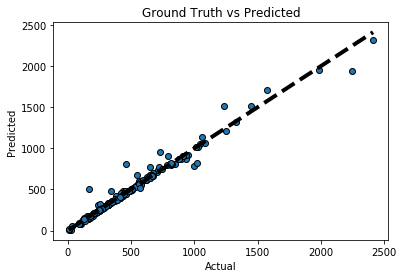

In [56]:
# So let's run the model against the test data
#from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(Y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

In [57]:
# Import the model we are using
# from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 100)
# Train the model on training data
rf.fit(X_train, Y_train);

In [58]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = mean_squared_error(Y_test, predictions)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'seconds.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 2376.51 seconds.
Accuracy: -868.06 %.


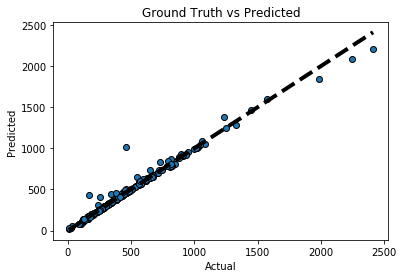

In [59]:
fig, ax = plt.subplots()
ax.scatter(Y_test, predictions, edgecolors=(0, 0, 0))
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()